In [14]:
import os
import cv2
import numpy as np
import warnings

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split #Separar dados de treino e teste
from sklearn.utils import shuffle #Embaralhar dados
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve,classification_report, accuracy_score, confusion_matrix, auc

In [15]:
def dataAugmentation(path, classe):
    image = load_img(path)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    # contruindo o gerador de imagem para data augmentation
    aug = ImageDataGenerator(
        rotation_range=30,
        zoom_range=0.15,
        #width_shift_range=0.2,
        #height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode="nearest")
    
    total = 0
    saveDir = ''
    #local de destino das imagens
    if(classe == 0):
        saveDir = 'C:/Users/David/PycharmProjects/CNN-Pterygium/Aug/NewG0/'
    elif(classe == 1):
        saveDir = 'C:/Users/David/PycharmProjects/CNN-Pterygium/Aug/NewG1/'
    elif(classe == 2):
        saveDir = 'C:/Users/David/PycharmProjects/CNN-Pterygium/Aug/NewG2/'
    elif(classe == 3):
        saveDir = 'C:/Users/David/PycharmProjects/CNN-Pterygium/Aug/NewG3/'
    elif(classe == 4):
        saveDir = 'C:/Users/David/PycharmProjects/CNN-Pterygium/Aug/NewG4/'
        
    imageGen = aug.flow(image, batch_size=1, save_to_dir=saveDir,
            save_prefix="image", save_format="jpg")
    # loop que faz o controle do número de imagens a serem geradas (no caso 100)
    for image in imageGen:
        total += 1
        if total == 25:
            break

In [16]:
path = 'C:/Users/David/PycharmProjects/CNN-Pterygium/GrausPt/'

for caminho, d, file in os.walk(path):
    for filename in file:
        img = cv2.imread(os.path.join(caminho,filename))

        if caminho == 'C:/Users/David/PycharmProjects/CNN-Pterygium/GrausPt/g0':
            cv2.imwrite('C:/Users/David/PycharmProjects/CNN-Pterygium/Aug/NewG0/'+filename, img)
            dataAugmentation(os.path.join(caminho,filename), 0)
       
        elif caminho == 'C:/Users/David/PycharmProjects/CNN-Pterygium/GrausPt/g1':
            cv2.imwrite('C:/Users/David/PycharmProjects/CNN-Pterygium/Aug/NewG1/'+filename, img)
            dataAugmentation(os.path.join(caminho,filename), 1)
          
        elif caminho == 'C:/Users/David/PycharmProjects/CNN-Pterygium/GrausPt/g2':
            cv2.imwrite('C:/Users/David/PycharmProjects/CNN-Pterygium/Aug/NewG2/'+filename, img)
            dataAugmentation(os.path.join(caminho,filename), 2)
            
        elif caminho == 'C:/Users/David/PycharmProjects/CNN-Pterygium/GrausPt/g3':
            cv2.imwrite('C:/Users/David/PycharmProjects/CNN-Pterygium/Aug/NewG3/'+filename, img)
            dataAugmentation(os.path.join(caminho,filename), 3)
        
        elif caminho == 'C:/Users/David/PycharmProjects/CNN-Pterygium/GrausPt/g4':
            cv2.imwrite('C:/Users/David/PycharmProjects/CNN-Pterygium/Aug/NewG4/'+filename, img)
            dataAugmentation(os.path.join(caminho,filename), 4)

In [17]:
path = os.getcwd()+'/Aug/'
data_set = []
saidas = []
        
for caminho, d, file in os.walk(path):
    for filename in file:
        
        img = cv2.imread(os.path.join(caminho,filename))
        
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #Deixa a imagem com tons de cinza
        #equalized_image = cv2.equalizeHist(gray) #Aumentar o contraste da imagem
        img = np.array(cv2.resize(img, (128,128), interpolation = cv2.INTER_AREA))
        data_set.append(img.reshape(-1))
        
        if caminho == os.getcwd()+'/Aug/NewG0':
            saidas.append(0)
        elif caminho == os.getcwd()+'/Aug/NewG1':
            saidas.append(1)
        elif caminho == os.getcwd()+'/Aug/NewG2':
            saidas.append(2)
        elif caminho == os.getcwd()+'/Aug/NewG3':
            saidas.append(3)
        elif caminho == os.getcwd()+'/Aug/NewG4':
            saidas.append(4)

In [18]:
X = np.array(data_set)
y = np.array(saidas)

X = np.array(X) / 255.

X, y= shuffle(X, y) #embaralha os dados
#separa os dados em treino e teste com porcentagen de 80% para treino
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [19]:
X_train.shape, X_test.shape

((7187, 49152), (1797, 49152))

In [20]:
print(__doc__)
X = np.array(X) / 255.

X, y= shuffle(X, y) #embaralha os dados
#separa os dados em treino e teste com porcentagen de 80% para treino
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42) 

mlp = MLPClassifier(hidden_layer_sizes=(16,32,32,64), max_iter=60, alpha=1e-4, activation='relu',
                    solver='adam', verbose=10, random_state=1,
                    learning_rate_init=.1)

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning,
                            module="sklearn")
    mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Automatically created module for IPython interactive environment
Iteration 1, loss = 1.98801168
Iteration 2, loss = 1.37670880
Iteration 3, loss = 1.37419363
Iteration 4, loss = 1.36625729
Iteration 5, loss = 1.36037146
Iteration 6, loss = 1.35930090
Iteration 7, loss = 1.35851779
Iteration 8, loss = 1.35431382
Iteration 9, loss = 1.35418253
Iteration 10, loss = 1.35081489
Iteration 11, loss = 1.35211465
Iteration 12, loss = 1.34997002
Iteration 13, loss = 1.34808157
Iteration 14, loss = 1.34722984
Iteration 15, loss = 1.34886303
Iteration 16, loss = 1.34622381
Iteration 17, loss = 1.34557855
Iteration 18, loss = 1.34432292
Iteration 19, loss = 1.34373352
Iteration 20, loss = 1.34288815
Iteration 21, loss = 1.34205032
Iteration 22, loss = 1.34230050
Iteration 23, loss = 1.34192446
Iteration 24, loss = 1.34227566
Iteration 25, loss = 1.34198663
Iteration 26, loss = 1.34232282
Iteration 27, loss = 1.34152386
Iteration 28, loss = 1.34148338
Iteration 29, loss = 1.34141375
Iteration 30, lo

In [7]:
clf = LogisticRegression(random_state=0, solver='sag', max_iter=100)
clf.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       553
           1       0.95      0.74      0.83       399
           2       0.88      0.65      0.75       781
           3       0.80      0.94      0.86      3370
           4       0.83      0.72      0.77      1871

    accuracy                           0.83      6974
   macro avg       0.89      0.79      0.83      6974
weighted avg       0.84      0.83      0.83      6974



In [9]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.48      0.61       156
           1       0.33      0.25      0.28       104
           2       0.38      0.20      0.26       211
           3       0.59      0.75      0.66       821
           4       0.44      0.40      0.42       452

    accuracy                           0.54      1744
   macro avg       0.51      0.42      0.45      1744
weighted avg       0.53      0.54      0.52      1744



In [10]:
a = clf.predict_proba(X_test[13:14, :])

In [11]:
for i in range(5):
    print(round(a[:,i][0]*100, 2))

0.23
38.35
5.0
53.83
2.59


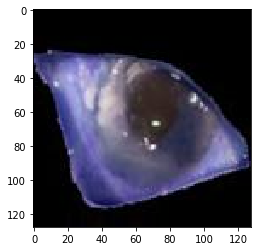

In [17]:
plt.imshow(X_test[13:14,:].reshape(128,128,3))